### 1. Data Preparation:

In [1]:
import pandas as pd
df=pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


### 2. Exploratory Data Analysis (EDA):

In [2]:
df.shape, df.columns

((908, 13),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
        'exang', 'oldpeak', 'slope', 'thal', 'num'],
       dtype='object'))

In [3]:
df.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         3
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [4]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [5]:
# Check for Numeric columns and Categorical columns
num_col = df.select_dtypes(include=['number']).columns
cat_col=df.select_dtypes(include=['object']).columns
print("Numeric columns are: ", num_col)
print("Categorical columns are: ", cat_col)

Numeric columns are:  Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')
Categorical columns are:  Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [6]:
# Handle missing values appropriately (e.g., imputation, deletion).
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
df_new=df.corr(numeric_only = True)
df_new

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


In [8]:
# fillna function in python (in pandas library) fills missing values in data frame
# replces missing valuse in a column or columns with a specified value
df_new = df.fillna(" ")
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,,downsloping,normal,4


In [9]:
df_new.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,fixed defect,4


In [12]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

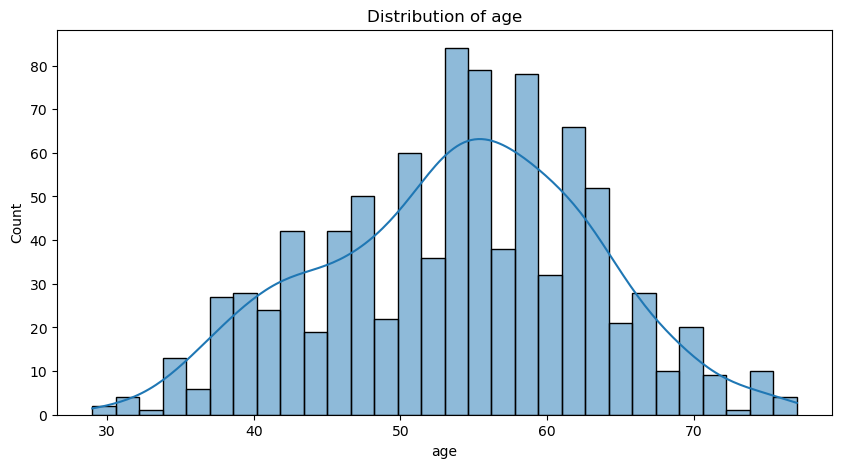

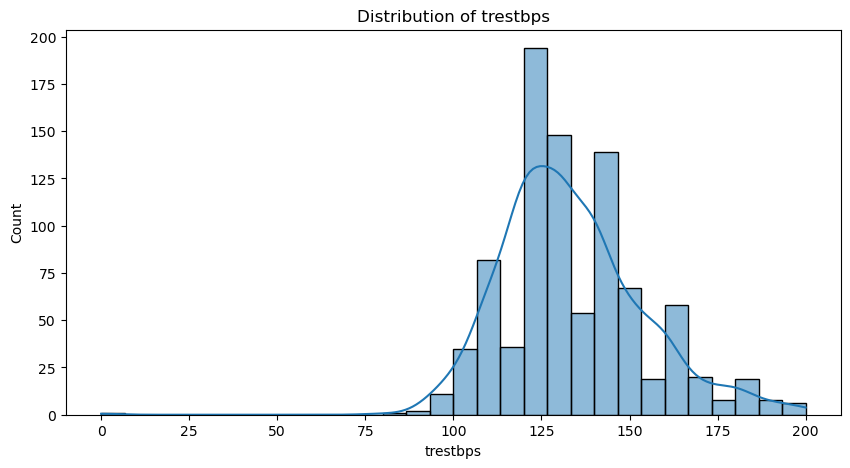

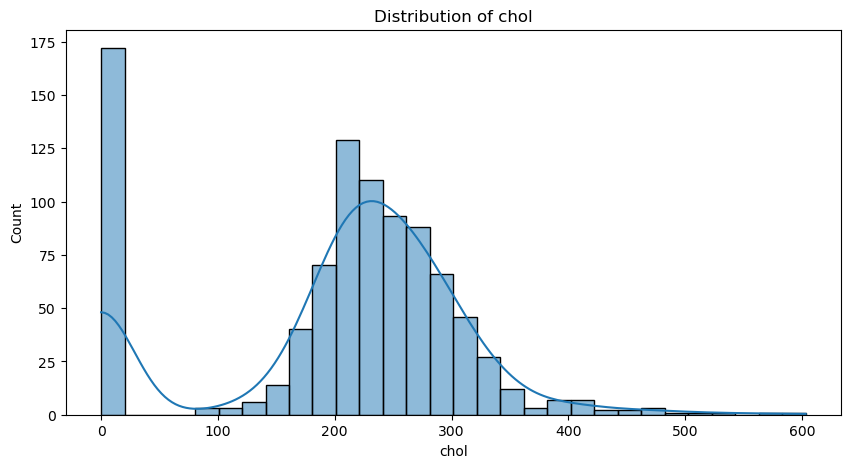

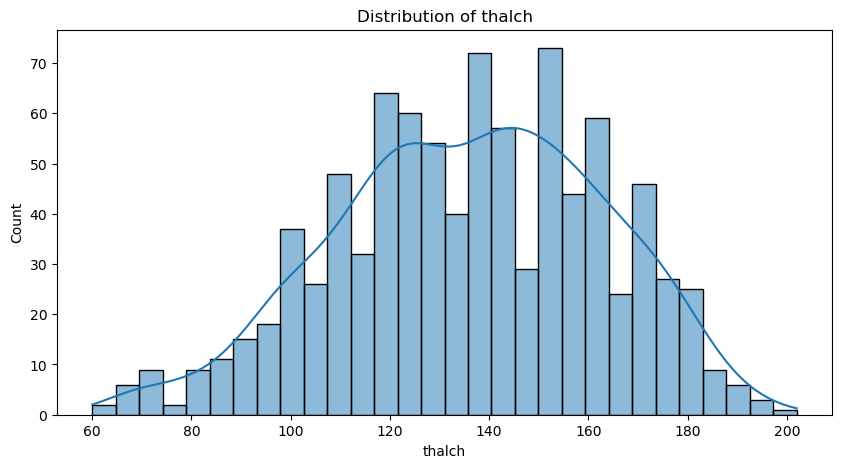

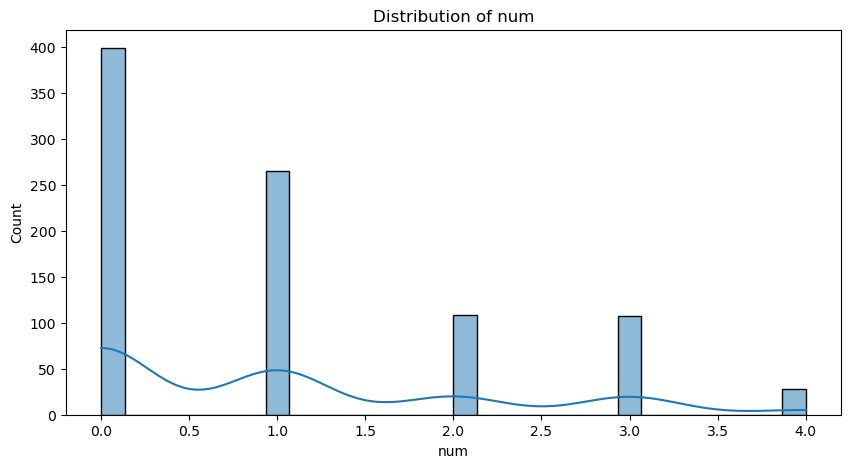

In [14]:
# Histograms
for i in df_new.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df_new[i], bins =30, kde=True)
  plt.title(f"Distribution of {i}")
  plt.show()

In [15]:
# Identify the numerical data
z=df.corr(numeric_only=True)
z

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


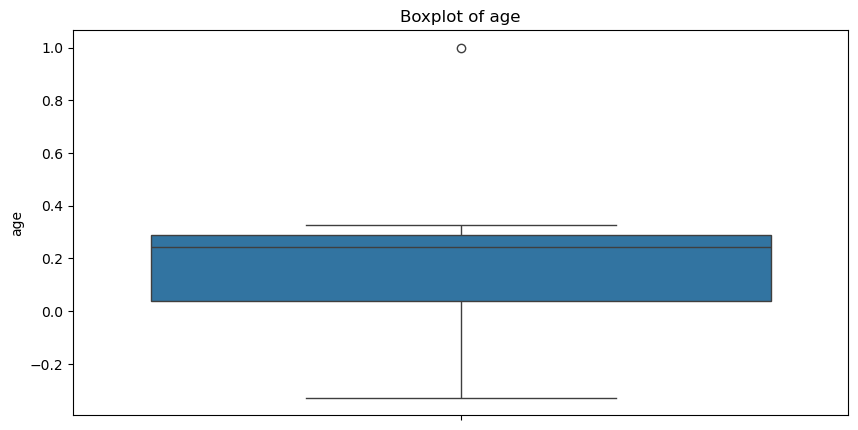

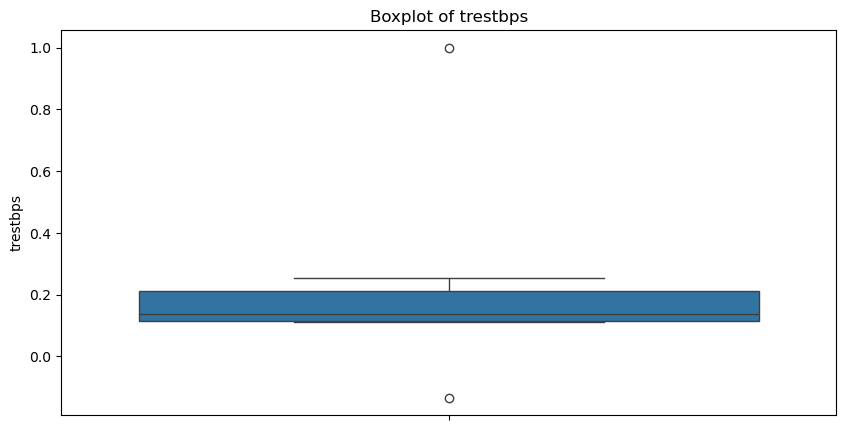

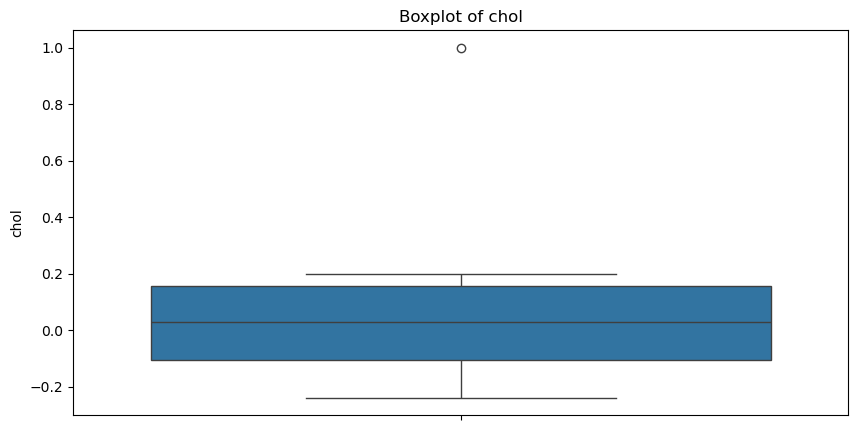

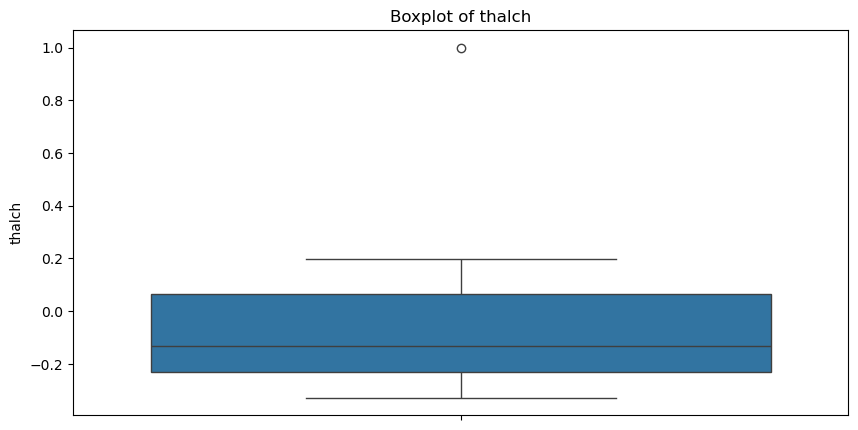

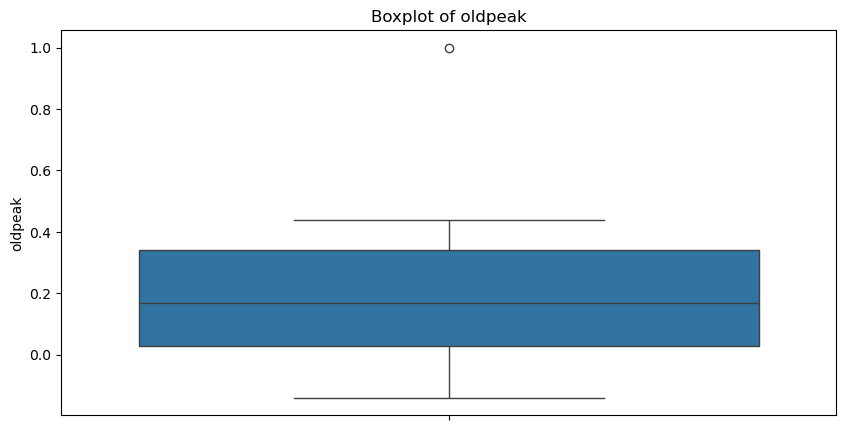

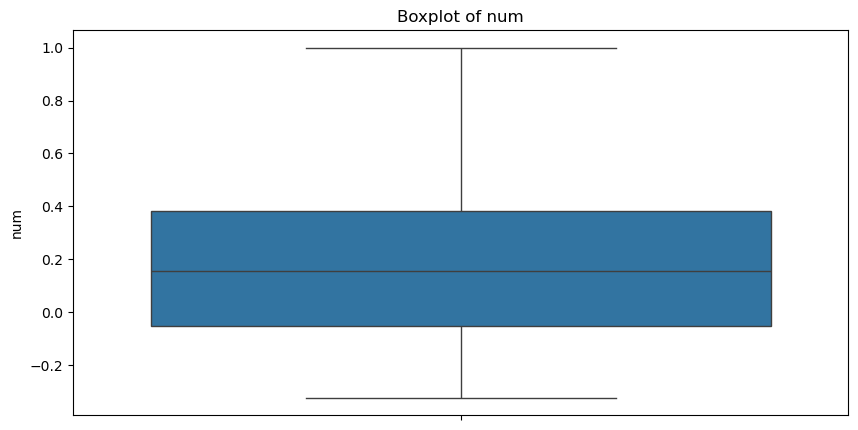

In [16]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(z[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

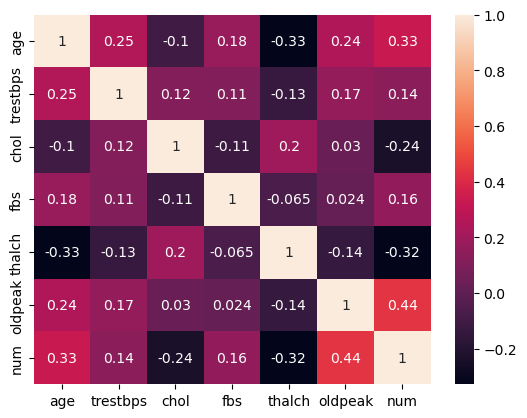

In [17]:
# plot heatmap
import seaborn as sns
sns.heatmap(z,annot=True)
plt.show()

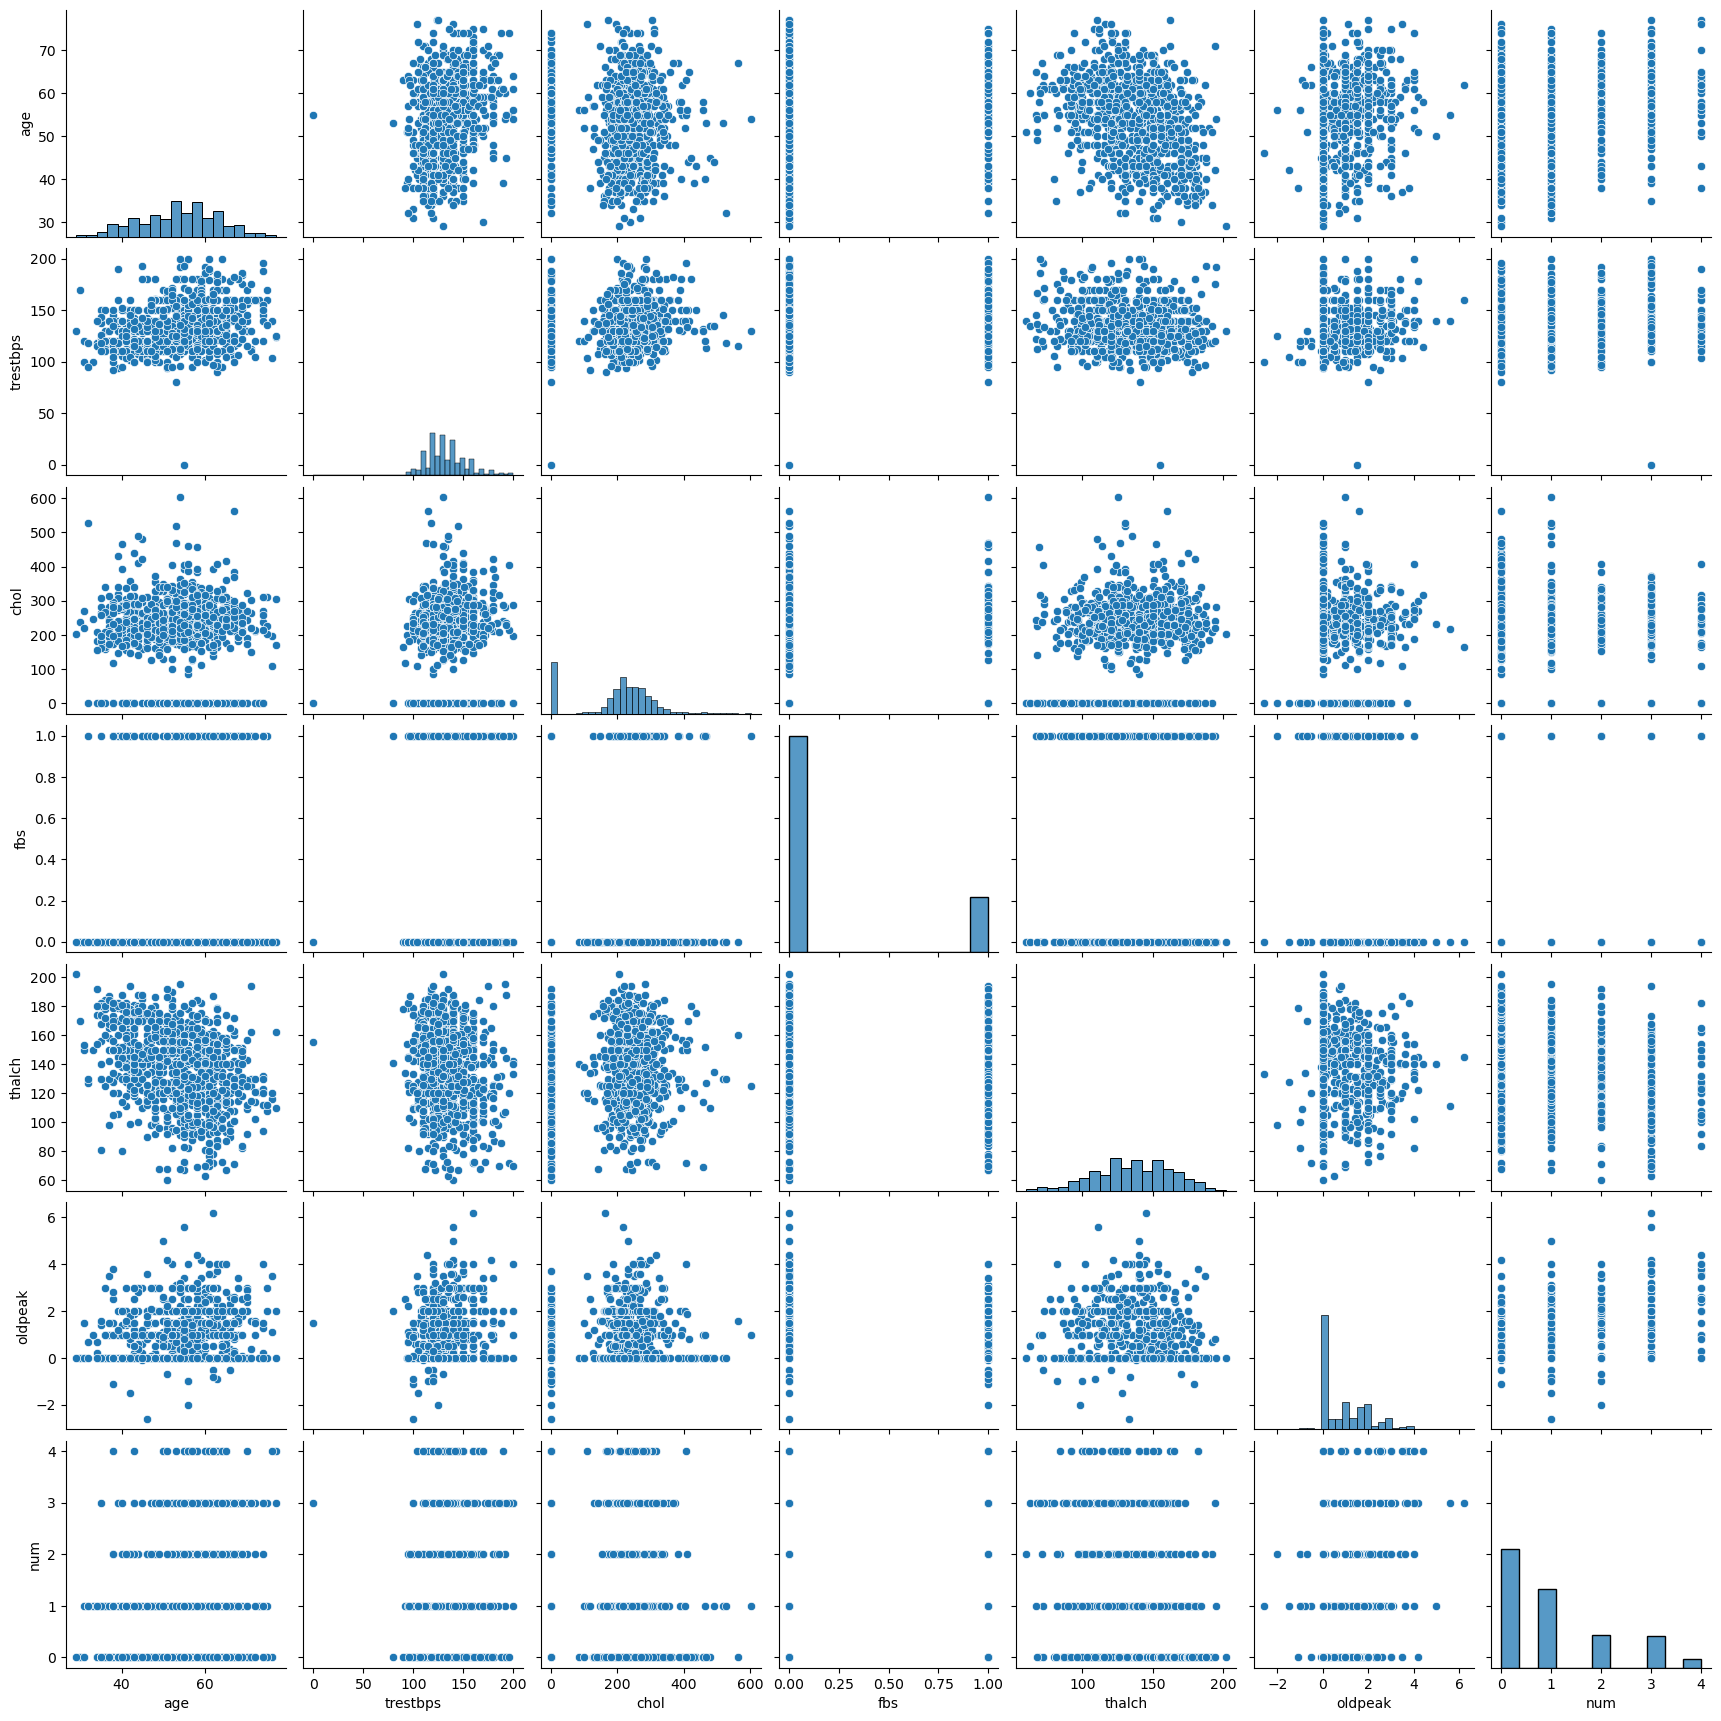

In [18]:
# plot pair plot
sns.pairplot(df)
plt.show()

### 3. Feature Engineering:

In [19]:
# Check for Numeric columns and Categorical columns
print(df.columns)
num_col = df.select_dtypes(include=['number']).columns
cat_col=df.select_dtypes(include=['object']).columns
print("Numeric columns are: ", num_col)
print("Categorical columns are: ", cat_col)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')
Numeric columns are:  Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')
Categorical columns are:  Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [20]:
from sklearn.preprocessing import LabelEncoder

# create instance of label encoder
lab = LabelEncoder()

# perform label encoding on cetegrical columns
columns_to_encode = ['sex', 'cp','fbs','restecg', 'exang', 'slope', 'thal']

# Apply label encoding using a loop
for column in columns_to_encode:
    df_new[column] = lab.fit_transform(df_new[column])

# view final df
print(df_new)


     age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang oldpeak  slope  \
0     63    1   3       145   233    1        0     150      0     2.3      0   
1     41    1   1       135   203    0        1     132      0     0.0      1   
2     57    1   0       140   192    0        1     148      0     0.4      1   
3     52    1   3       118   186    0        0     190      0     0.0      1   
4     57    1   0       110   201    0        1     126      1     1.5      1   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...     ...    ...   
903   53    1   0       125     0    0        1     120      0     1.5      2   
904   62    1   0       166   170    0        2     120      1     3.0      1   
905   56    1   2       170     0    0        0     123      1     2.5      0   
906   56    1   2       144   208    1        2     105      2              0   
907   57    1   0       142   277    1        2     182      0              1   

     thal  num  
0       0 

### 4. Decision Tree Classification:

In [21]:
from sklearn.model_selection import train_test_split

# Define x_train and y_train using your DataFrame
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang',  'slope', 'thal']
target = ['num']
x = df_new[features]  # Features for training
y = df_new[target]  # Target variable

# Now split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% train, 20% validation

In [22]:
# MODEL BUIDING AND MODEL EVELUATION
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix)
dtree = DecisionTreeClassifier(max_depth=2,random_state=42)
dtree = dtree.fit(x_train,y_train)

# predict using classifier
y_pred = dtree.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.37      0.56      0.45        48
           2       0.00      0.00      0.00        22
           3       0.17      0.24      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.26      0.31      0.28       182
weighted avg       0.50      0.54      0.51       182



C:\DataScience\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\DataScience\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\DataScience\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5. Hyperparameter Tuning:

In [23]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(x_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.5523382144544167
DecisionTreeClassifier(max_depth=4, min_samples_leaf=19, random_state=1)


### 6. Model Evaluation and Analysis:

'\ntree.plot_tree(dtree,\n          feature_names=features,\n          rounded=True, # Rounded node edges\n          filled=True, # Adds color according to class\n          proportion=True); # Displays the proportions of class samples instead of the whole number of samples\n'

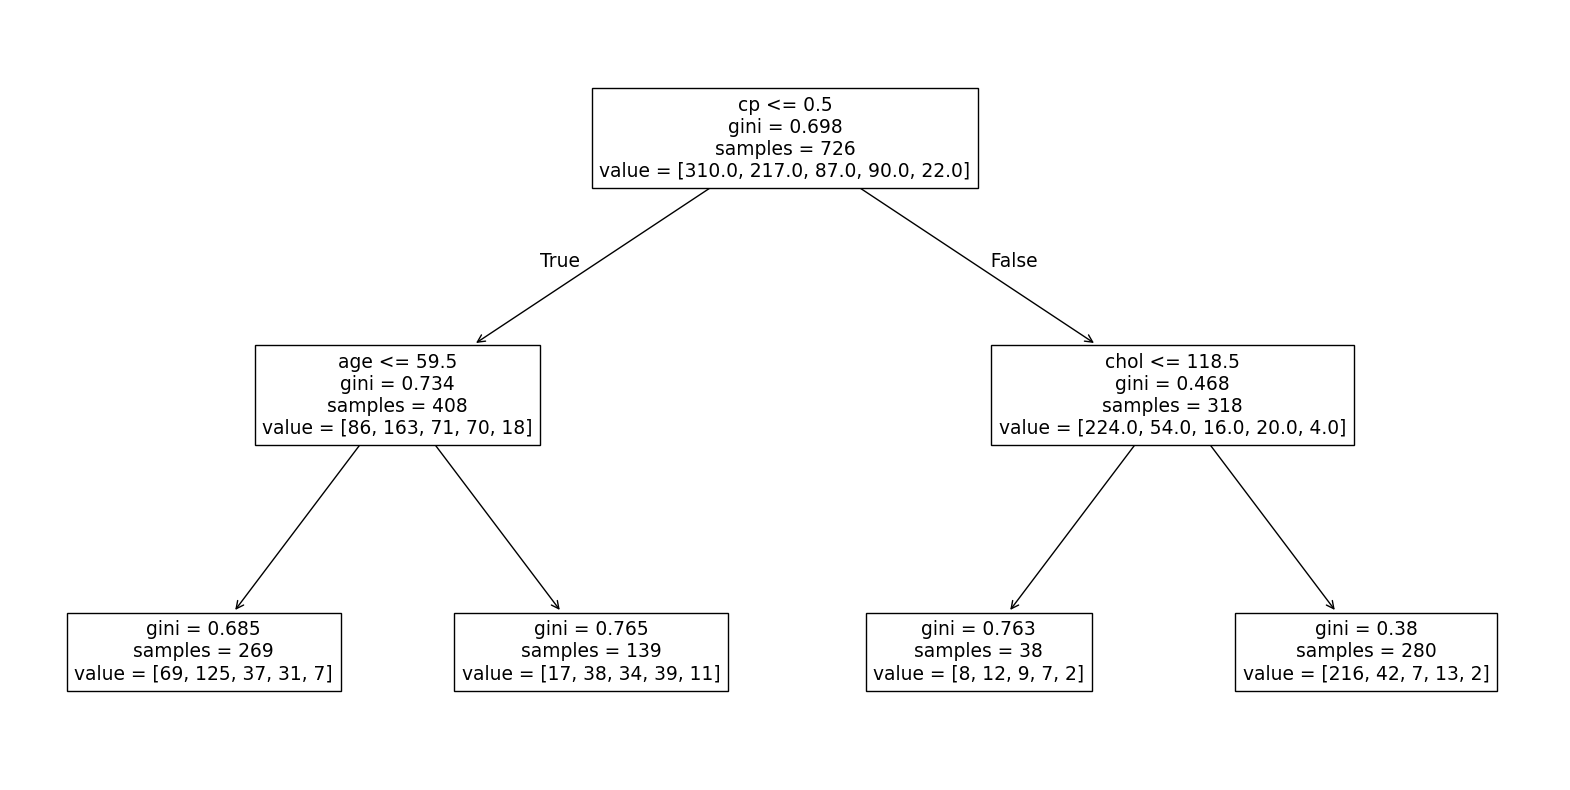

In [25]:
from sklearn import tree
#dtree = DecisionTreeClassifier(max_depth=2,random_state=42)
#dtree = dtree.fit(x_train,y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(dtree,feature_names=features)
'''
tree.plot_tree(dtree,
          feature_names=features,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples
'''

In [ ]:
# gini = 0.698: it is number between 0.0 to 0.8
# cp rank <= 0.5 will follow true arrow to the left and rest will follow false arrow to the right
# total samples are 726
# gini method: uses formula 1-(x/n)^2- (y/n)^2 where as x is no. of positive answers
# y is no. of negetive anwers

### Interview Questions: